In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import os

if 'notebooks' in os.getcwd():
    os.chdir('..')

In [117]:
data = pd.read_csv("data/prices_round_2_day_1.csv", sep = ';')\
    .set_index("timestamp")

In [118]:
data

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,1,PINA_COLADAS,15013,34,15012.0,54.0,NaN,NaN,15016,88,NaN,NaN,NaN,NaN,15014.5,0.0
0,1,BANANAS,4871,9,4870.0,23.0,NaN,NaN,4877,23,NaN,NaN,NaN,NaN,4874.0,0.0
0,1,COCONUTS,8003,200,NaN,NaN,NaN,NaN,8006,200,NaN,NaN,NaN,NaN,8004.5,0.0
0,1,PEARLS,9998,9,9995.0,23.0,NaN,NaN,10005,23,NaN,NaN,NaN,NaN,10001.5,0.0
100,1,BANANAS,4875,1,4871.0,4.0,4870.0,22.0,4877,22,NaN,NaN,NaN,NaN,4876.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999800,1,PEARLS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,-224.0
999900,1,PINA_COLADAS,14850,21,14849.0,62.0,NaN,NaN,14853,83,NaN,NaN,NaN,NaN,14851.5,115804.0
999900,1,BANANAS,4820,20,NaN,NaN,NaN,NaN,4827,20,NaN,NaN,NaN,NaN,4823.5,97704.0


In [119]:
coconuts = data.query("product == 'COCONUTS'")
pina_coladas = data.query("product == 'PINA_COLADAS'")

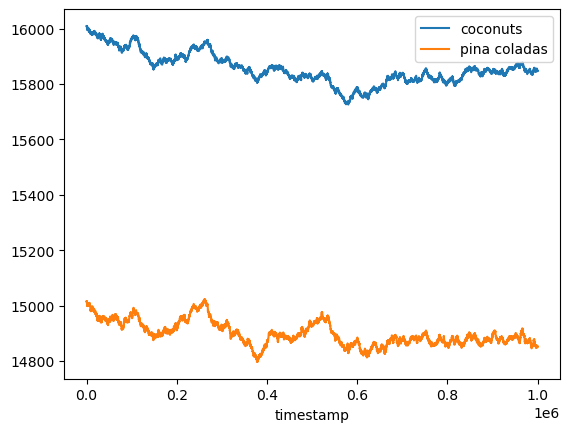

In [120]:
(2*coconuts.mid_price).plot(label = "coconuts")
pina_coladas.mid_price.plot(label = "pina coladas")
plt.legend()

In [121]:
coconuts\
    .mid_price\
    .corr(
        pina_coladas.mid_price
    )

0.8130747836160973

# Verifying spread between coconuts and pina coladas

In [122]:
spread = pina_coladas["mid_price"] - coconuts["mid_price"]  

In [123]:
spread_minus_mean = spread - spread.mean()

## 1st approach- total mean

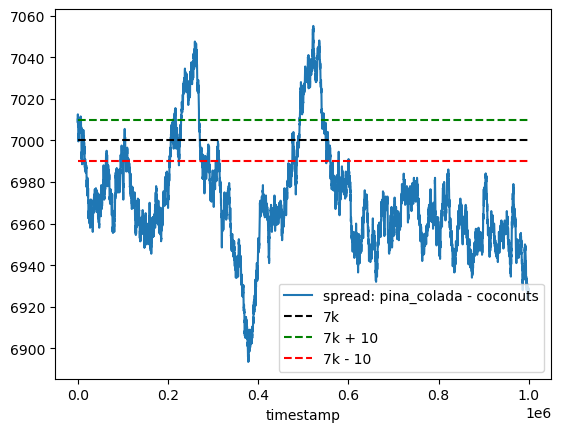

In [127]:
spread.plot(label = "spread: pina_colada - coconuts")
plt.hlines(
    7_000,
    spread.index[0],
    spread.index[-1],
    colors = "black",
    label='7k',
    linestyles="dashed"
)

plt.hlines(
    7_000 +10,
    spread.index[0],
    spread.index[-1],
    colors = "green",
    label='7k + 10',
    linestyles="dashed"
)

plt.hlines(
    7_000 - 10,
    spread.index[0],
    spread.index[-1],
    colors = "red",
    label='7k - 10',
    linestyles="dashed"
)

plt.legend()

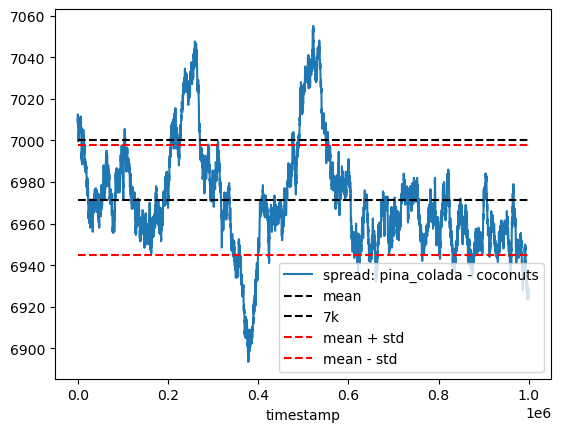

In [124]:
spread.plot(label = "spread: pina_colada - coconuts")
plt.hlines(
    spread.mean(),
    spread.index[0],
    spread.index[-1],
    colors = "black",
    label='mean',
    linestyles="dashed"
)

plt.hlines(
    7_000,
    spread.index[0],
    spread.index[-1],
    colors = "black",
    linestyles="dashed",
    label= "7k"
)

plt.hlines(
    spread.mean() + spread.std(),
    spread.index[0],
    spread.index[-1],
    colors = "red",
    linestyles="dashed",
    label= "mean + std"
)




plt.hlines(
    spread.mean() - spread.std(),
    spread.index[0],
    spread.index[-1],
    colors = "red",
    linestyles="dashed",
    label= "mean - std"
)

plt.legend()

In [84]:
spread.describe()

count    10000.000000
mean      7040.585400
std         41.927414
min       6967.500000
25%       7006.000000
50%       7029.500000
75%       7075.500000
max       7140.000000
Name: mid_price, dtype: float64

## 2nd approach - rolling mean

# Veryfing mean of spread over time

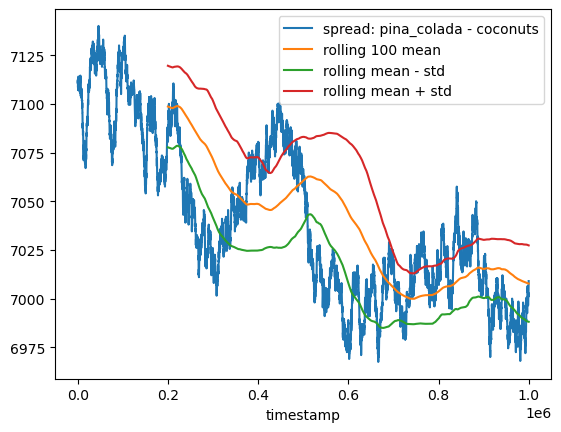

In [91]:
spread.plot(label = "spread: pina_colada - coconuts")

avg_rolling_spread = spread.rolling(1000)\
    .mean()

rolling_std_spread = spread.rolling(1000)\
    .std()

avg_rolling_spread.plot(label = "rolling 100 mean")
(avg_rolling_spread - rolling_std_spread).plot(label = "rolling mean - std")
(avg_rolling_spread + rolling_std_spread).plot(label = "rolling mean + std")

plt.legend()

In [86]:
avg_rolling_spread

timestamp
0             NaN
100           NaN
200           NaN
300           NaN
400           NaN
           ...   
999500    6998.97
999600    6999.19
999700    6999.34
999800    6999.57
999900    6999.80
Name: mid_price, Length: 10000, dtype: float64

<AxesSubplot:xlabel='timestamp'>

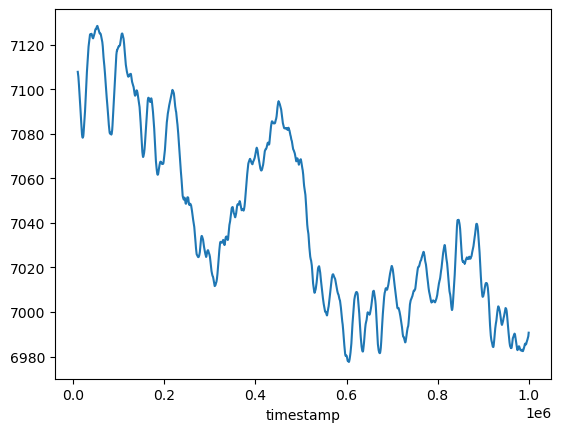

In [87]:
spread.rolling(100)\
    .mean()\
    .plot()

# Liquidity study 

In [137]:
bid_mask_coconuts = coconuts.columns.str.contains("bid_volume")

coconuts[coconuts.columns[bid_mask_coconuts]]\
    .sum(axis=1)\
    .describe()

count    10000.000000
mean       187.180800
std         23.926148
min        101.000000
25%        171.000000
50%        186.000000
75%        201.000000
max        298.000000
dtype: float64

In [138]:
ask_mask_coconuts = coconuts.columns.str.contains("ask_volume")

coconuts[coconuts.columns[ask_mask_coconuts]]\
    .sum(axis=1)\
    .describe()

count    10000.000000
mean       187.299200
std         22.446926
min        140.000000
25%        172.000000
50%        186.000000
75%        201.000000
max        302.000000
dtype: float64

In [139]:
bid_mask_pina_coladas = pina_coladas.columns.str.contains("bid_volume")

pina_coladas[pina_coladas.columns[bid_mask_pina_coladas]]\
    .sum(axis=1)\
    .describe()


count    10000.000000
mean        93.878300
std         12.117622
min         50.000000
25%         86.000000
50%         93.000000
75%        101.000000
max        152.000000
dtype: float64

In [141]:
aks_mask_pina_coladas = pina_coladas.columns.str.contains("bid_volume")

pina_coladas[pina_coladas.columns[ask_mask_coconuts]]\
    .sum(axis=1)\
    .describe()

count    10000.000000
mean        93.732400
std         11.488185
min         70.000000
25%         86.000000
50%         93.000000
75%        100.000000
max        151.000000
dtype: float64